<a href="https://colab.research.google.com/github/MathMachado/DSWP/blob/master/Notebooks/NB15_ML_UL_APRENDIZAGEM_NAO_SUPERVISIONADA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MACHINE LEARNING | APRENDIZAGEM NÃO SUPERVISIONADA | CLUSTERING & PCA (Principal Components Analysis)

## Leitura Complementar
https://scikit-learn.org/stable/

# Introdução aos Algoritmos de Aprendizagem não-supervisionada
* Unsupervised Learning são um tipo de Machine Learning que trabalha com dataframes não-rotulados;
* Intuitivamente, os modelos desta classe tentam estabelecer relacionamento entre os dados;
* Algoritmo mais comum: clustering.

# Clustering
* Agrupa objetos similares.
* Aplicações de Clustering:
  - Rotular os dados;
  - Entender padrões escondindos nos dados;

## Exemplo

### Carrega as bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Carrega os dados

In [ ]:
from sklearn.datasets import make_blobs # Import make_blobs from the correct module
X, y = make_blobs(n_features = 2, n_samples = 1000, centers = 3, cluster_std = 1, random_state = 20111974)

In [ ]:
X

array([[ 5.66868463,  2.60857758],
       [ 6.41530477,  2.06066118],
       [ 6.20602266,  2.49653283],
       ...,
       [ 1.26985212, -0.34504332],
       [ 0.71079332,  3.30008912],
       [ 2.50595087,  3.93242388]])

In [ ]:
y[:30]

array([2, 2, 2, 1, 0, 2, 0, 2, 2, 2, 1, 2, 2, 0, 1, 0, 0, 1, 0, 2, 2, 2,
       1, 1, 0, 0, 2, 1, 0, 2])

### Relação entre as variáveis

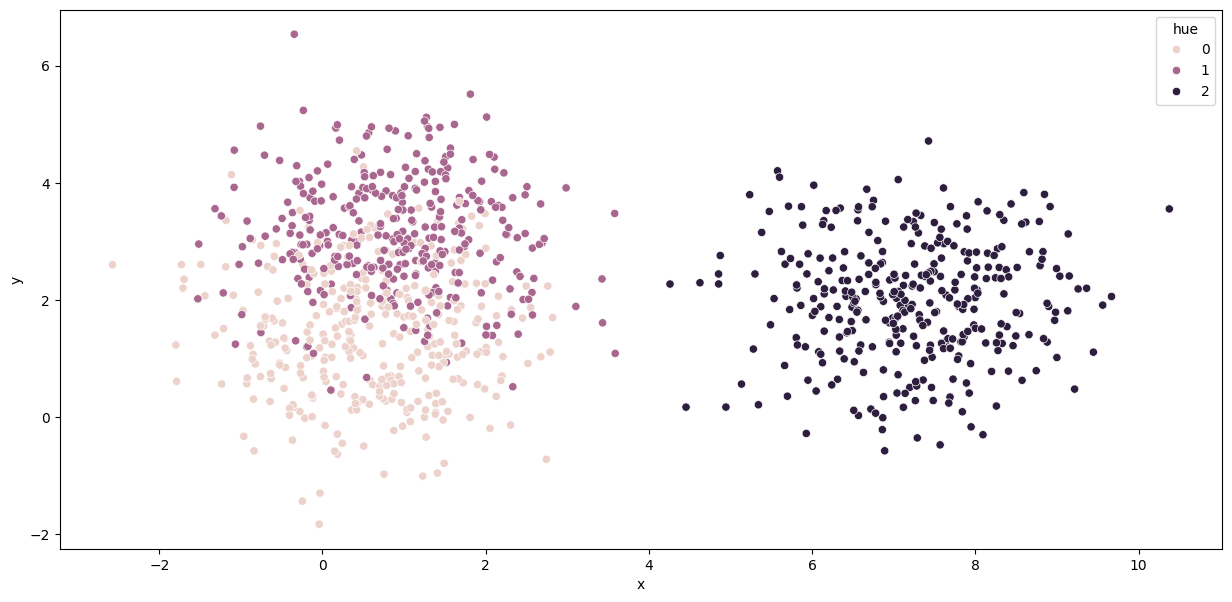

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas

f, ax = plt.subplots(figsize=(15, 7))

# Convert the NumPy array X to a pandas DataFrame
df = pd.DataFrame(X, columns=['x', 'y'])
# Add the 'hue' column to the DataFrame
df['hue'] = y

# Now use the DataFrame as the 'data' argument
sns.scatterplot(x='x', y='y', hue='hue', data=df)
plt.show()

### Distância ou Similaridade
* Dados do mesmo grupo/cluster são similares ao passo que dados pertencentes a diferentes grupos/clusters são diferentes;
* Precisamos medir a similaridade e diferenças entre os dados;
* Considere as seguintes medidas:

 - Distância de Minkowiski:

 <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/4060cc840aeab9e41b5e47356088889e2e7a6f0f">

 - Se p = 1 --> Distância de Manhattan;
 - Se p = 2 --> Euclidiana.

 - Cosseno: Adequado para dados de texto

 <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/1d94e5903f7936d3c131e040ef2c51b473dd071d">

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances, manhattan_distances
from scipy.spatial.distance import cdist

## Tipos de Clustering
* Métodos de particionamento:
  - Particionar N pontos em k partições.
  - Inicialmente, partições aleatórias são criadas e gradualmente os dados são movidos para outras partições;
  - Usa-se as distâncias entre os pontos para otimizar os clusters;
  - Exemplo: KMeans
* Métodos Hierárquicos
  - Decomposição do dataframe;
  - Approach 1: assume cada dado individual como cluster e na sequência os dados vão sendo agrupados conforme a similaridade;
  - Approach 2: Começa com 1 cluster para todos os dados e, na sequência, particiona-se em clusters menores;
* Métodos Density-based
  - Vai acrescentando dados ao cluster até que a densidade exceda um certo threashold.

## Métodos de Particionamento
### KMeans
> K-means é um algoritmo simples de Machine Learning que agrupa um conjunto de dados ou pontos em k clusters especificado pelo usuário.
>> O algoritmo é um tanto ingênuo, pois agrupa os dados em k clusters, mesmo que k não seja o número certo de agrupamentos a serem usados. Portanto, ao usar k-means, os usuários precisam de alguma maneira de determinar se estão usando o número certo de clusters.
>>> Formas de se determinar o número ideal de clusters:
* **Método de Elbow** - um dos métodos mais populares para determinar o valor ótimo de k;
* **Silhoute Score**;
* **Calinski Harabaz Score**;
* **Dendograma**.

#### Elbow Method
* O método de Elbow calcula:
    * **Distorção**: é a média das distâncias dos centros dos respectivos clusters. Normalmente, a métrica de distância euclidiana é usada.
    * **Inércia**: É a soma das distâncias quadradas das amostras ao centro de aglomerado mais próximo.
* Para determinar o número ideal de clusters, selecione o valor de k no gráfico de Elbow a partir do qual a distorção/inércia começa a diminuir de maneira linear.

### Algoritmo K-Means
1. Inicializa k centroides de forma aleatória;
2. Atribui cada dado/ponto ao centroide mais próximo, criando clusters;
3. Recalcula centroide, que é a média de todos os dados/pontos que pertencem a cada cluster;
4. Repete os passos 2 e 3 até que não se tenha dados/pontos para atribuir aos centroides;

* Os centróides são escolhidos de forma a minimizar a soma dos quadrados do cluster.

In [ ]:
from sklearn.datasets import make_blobs, make_moons

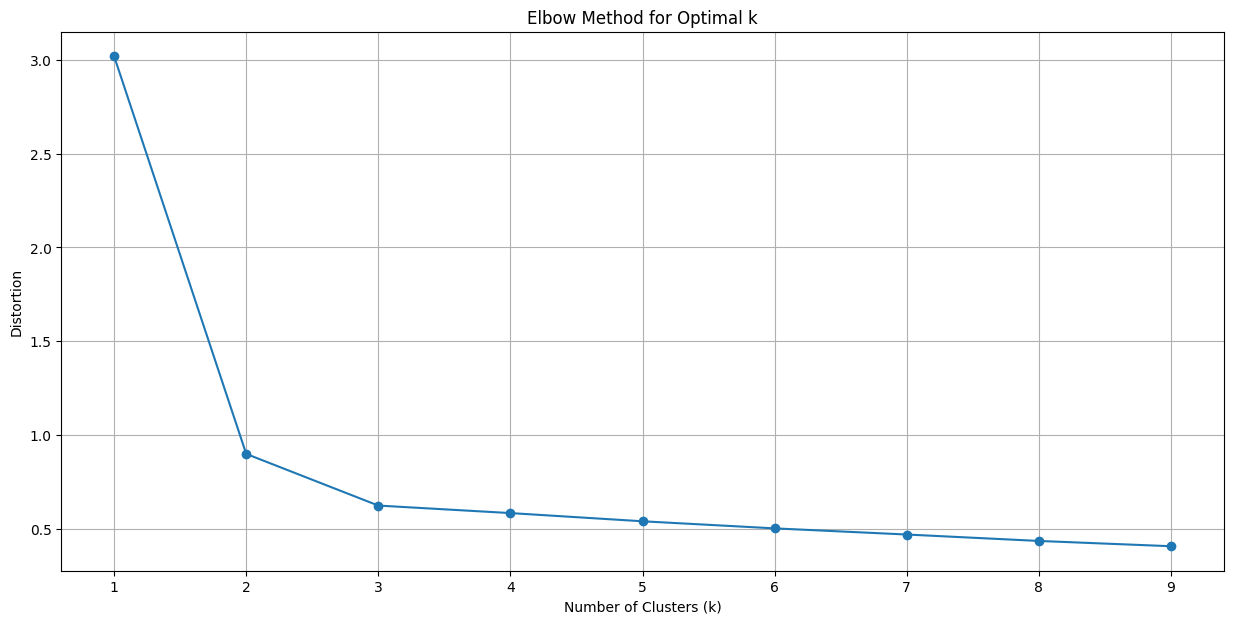

In [ ]:
!pip install scikit-learn matplotlib
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def Numero_Clusters_Elbow(X):
    """
    Calculates the optimal number of clusters using the Elbow method.

    Args:
        X: The data to be clustered.

    Returns:
        A list of distortions for each number of clusters.
    """
    distortions = []
    K = range(1, 10)
    for k in K:
        # Building and fitting the model
        kmeanModel = KMeans(n_clusters=k).fit(X)
        kmeanModel.fit(X)
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    return distortions

# Assuming X_ex1 is your data
distortions = Numero_Clusters_Elbow(X_ex1)

# Plotting the elbow graph
f, ax = plt.subplots(figsize=(15, 7))
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

### Exemplo 1

In [ ]:
X_ex1, y_ex1 = make_blobs(n_features = 2 , n_samples = 1000, cluster_std = .5, random_state = 20111974)
X_ex1

array([[6.40518791, 2.32170691],
       [6.77849798, 2.04774871],
       [6.67385692, 2.26568454],
       ...,
       [0.94464935, 0.52404095],
       [0.78069044, 3.19788541],
       [1.67826921, 3.51405279]])

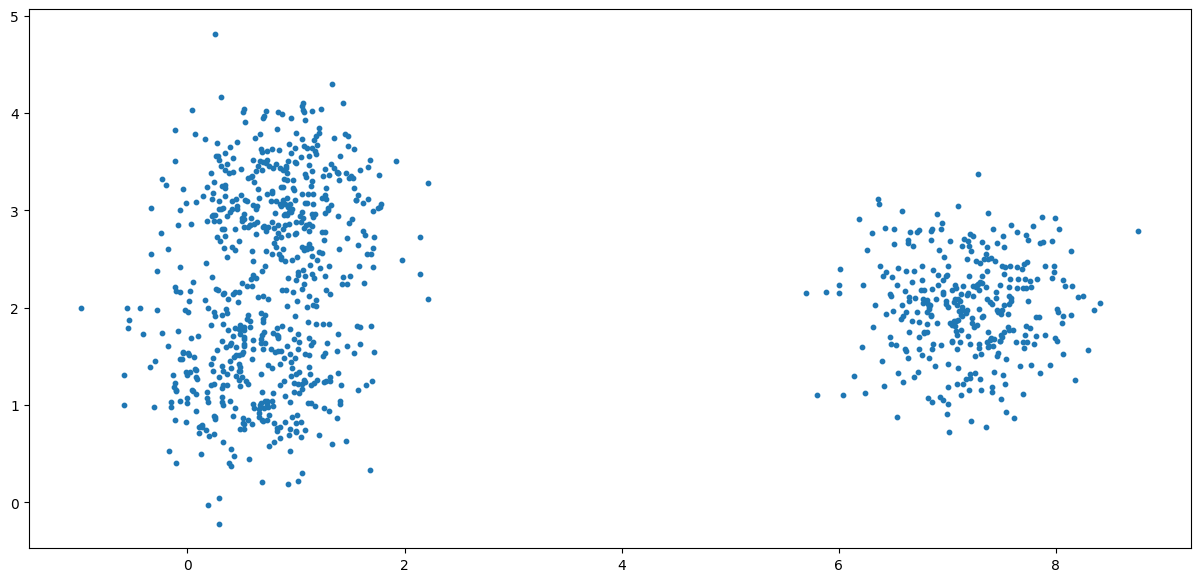

In [ ]:
f, ax = plt.subplots(figsize = (15, 7))
plt.scatter(X_ex1[:, 0], X_ex1[:, 1], s = 10)

Quantos clusters tem a figura acima?

In [ ]:
Numero_Clusters_Elbow(X_ex1)

[3.0201587242120222,
 0.898249765453814,
 0.6226515944261473,
 0.5841147951143469,
 0.5359351710303643,
 0.5026399818799521,
 0.4645488979480685,
 0.43549292492412783,
 0.4101488170603555]

Os gráficos de Elbon/Inércia apontam que o número ideal de clusters são 2. Entretanto, vamos pedir ao KMeans para construir 3 clusters:

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Instancia:
kmeans = KMeans(n_clusters = 3)

In [ ]:
# fit():
kmeans.fit(X_ex1)

KMeans(n_clusters=3)

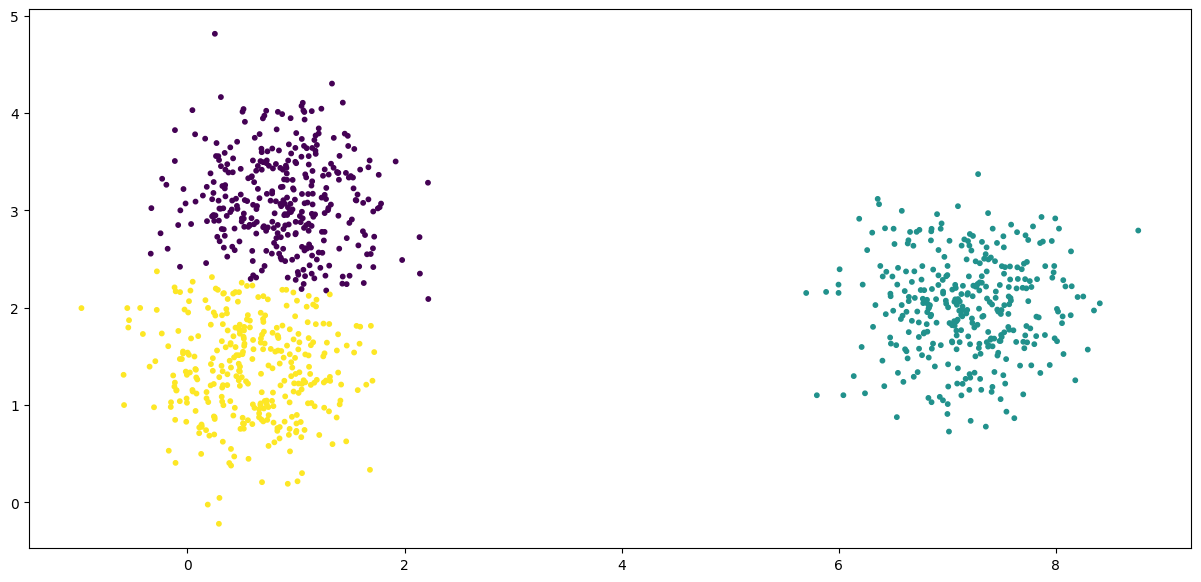

In [ ]:
f, ax = plt.subplots(figsize = (15, 7))
plt.scatter(X_ex1[:, 0], X_ex1[:, 1], s = 10, c = kmeans.predict(X_ex1))

E agora, com 2 clusters:

In [ ]:
# Instancia:
kmeans = KMeans(n_clusters = 2)

In [ ]:
# fit():
kmeans.fit(X_ex1)

KMeans(n_clusters=2)

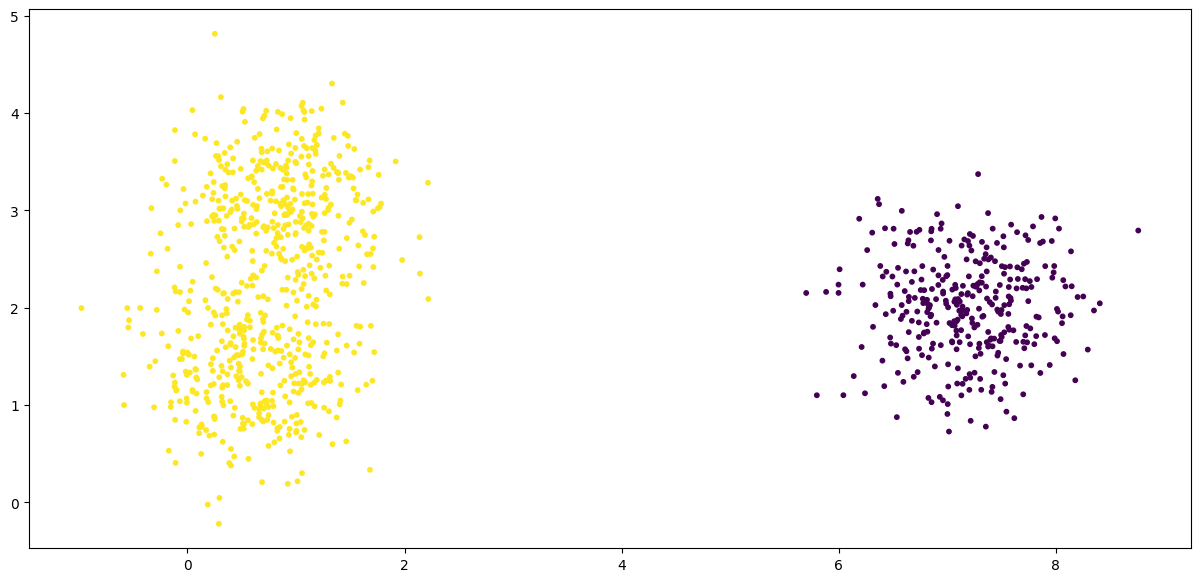

In [ ]:
f, ax = plt.subplots(figsize = (15, 7))
plt.scatter(X_ex1[:, 0], X_ex1[:, 1], s = 10, c = kmeans.predict(X_ex1))

### Dendograma
* O dendograma corrobora 2 clusters conforme sugerido por Elbow.

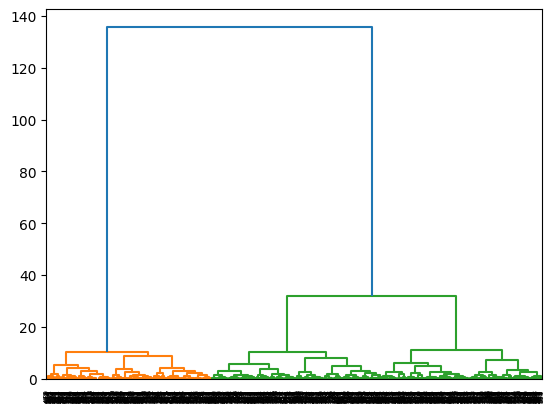

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X_ex1))
plt.show()

### Exemplo 2

In [ ]:
X_ex2, y_ex2 = make_moons(n_samples = 1000, noise = .09, random_state = 20111974)
X_ex2

array([[-0.73140001,  0.47001215],
       [-0.87984362,  0.0978015 ],
       [ 0.79788722,  0.75660805],
       ...,
       [ 0.01967691,  0.19383333],
       [ 2.16425263,  0.23586328],
       [-0.93898931,  0.60564072]])

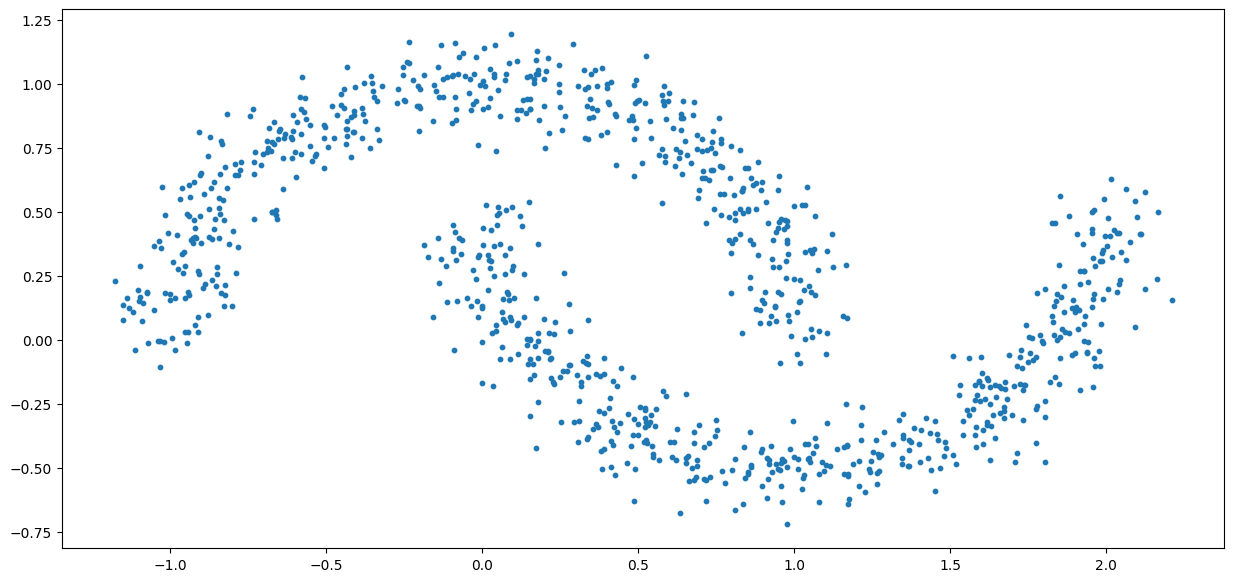

In [ ]:
f, ax = plt.subplots(figsize = (15, 7))
plt.scatter(X_ex2[:, 0], X_ex2[:, 1],s = 10)

In [ ]:
# Quantos clusters tem os dados acima
Numero_Clusters_Elbow(X_ex2)

[0.9289325192791931,
 0.6084048958289463,
 0.49359582845650085,
 0.3937348106833101,
 0.33540559600323827,
 0.281342958620438,
 0.2537125967165392,
 0.22601185610212918,
 0.2049549082081991]

Número ideal de clusters são 2.

In [ ]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_ex2)

KMeans(n_clusters=2)

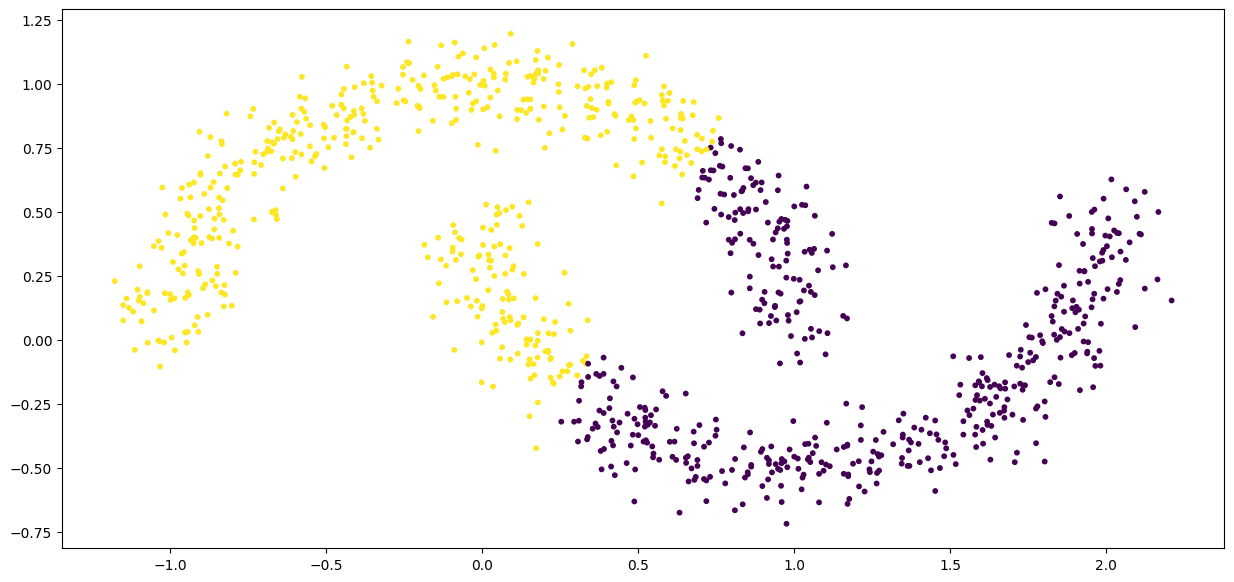

In [ ]:
f, ax = plt.subplots(figsize = (15, 7))
plt.scatter(X_ex2[:, 0], X_ex2[:, 1], s = 10, c = kmeans.predict(X_ex2))

### Dendograma

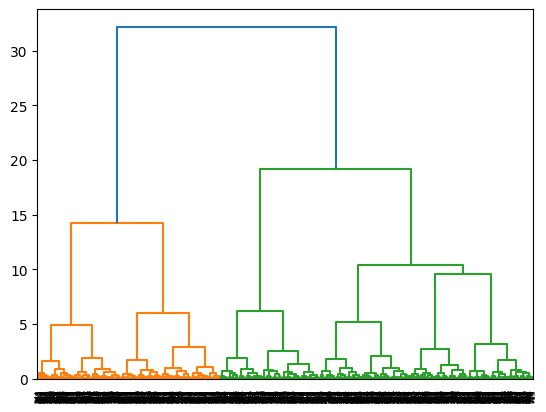

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X_ex2))
plt.show()

### Limitações do K-Means
* Chance/possibilidade de um dado/ponto pertencer à múltiplos clusters;
* K-Means tenta encontrar os mínimos locais e isso depende dos valores iniciais que são gerados aleatoriamente.

### Hierarchical Clustering
* Combina múltiplos clusters similares para criar um cluster ou OU particionar um cluster para criar clusters menores de forma a agrupar dados/pontos similares;
* Tipos de hierarchaial Clustering:
  - Agglomerative Method - botton-up approach.
  - Divisive Method - top-down approach.

#### Agglomerative Method
* Inicia atribuindo um cluster para cada dado/ponto;
* Combina clusters que possuem alta medida de similaridade;
* As diferenças entre os métodos surgem devido a diferentes maneiras de definir a distância (ou similaridade) entre os clusters. As seções a seguir descrevem várias técnicas aglomerativas em detalhes.
  - Single Linkage Clustering
  - Complete linkage clustering
  - Average linkage clustering
  - Average group linkage

### Exemplo 3

In [ ]:
X_ex3, y_ex3 = make_moons(n_samples = 1000, noise = .05, random_state = 20111974)
X_ex3

array([[-0.80465942,  0.45826551],
       [-0.91140725,  0.19194114],
       [ 0.80084991,  0.68428469],
       ...,
       [ 0.03636983,  0.18170267],
       [ 2.07506436,  0.23440238],
       [-0.84518671,  0.64119942]])

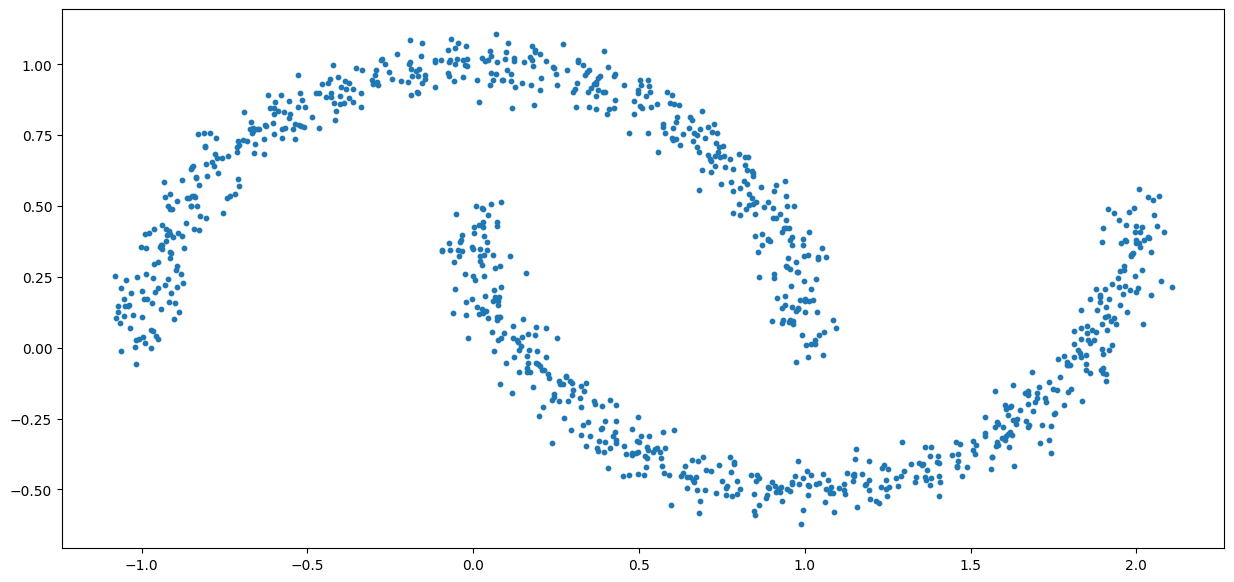

In [ ]:
f, ax = plt.subplots(figsize = (15, 7))
plt.scatter(X_ex3[:, 0], X_ex3[:, 1], s = 10)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(linkage = 'single', n_clusters = 2)
agc.fit(X_ex3)

AgglomerativeClustering(linkage='single')

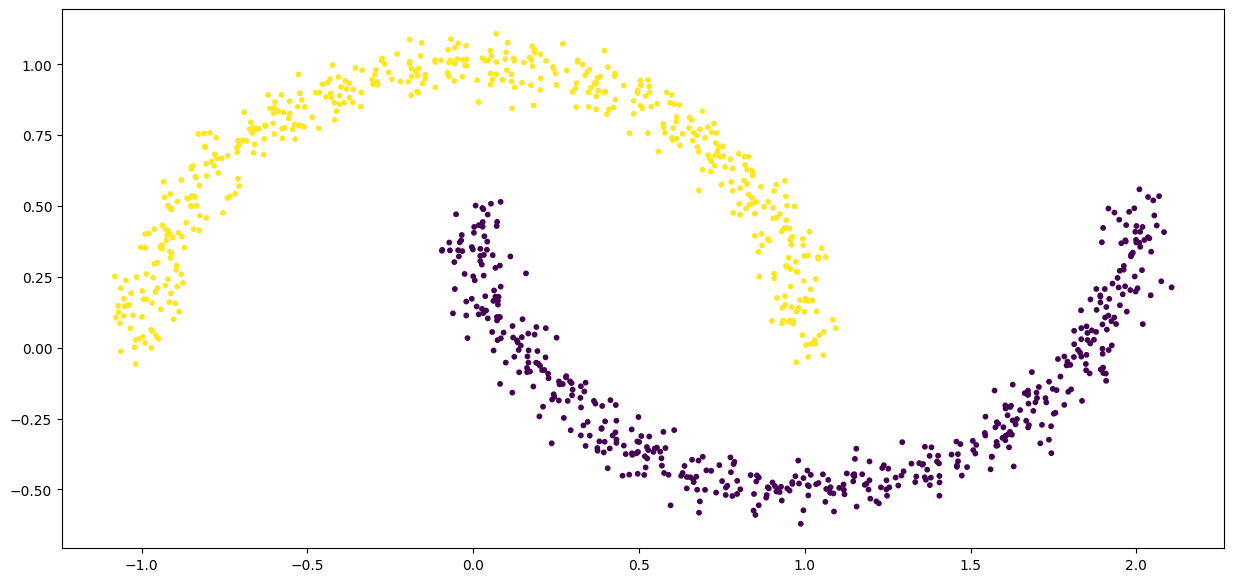

In [ ]:
f, ax = plt.subplots(figsize = (15, 7))
plt.scatter(X_ex3[:, 0], X_ex3[:, 1], s = 10, c = agc.labels_)

### Dendograma

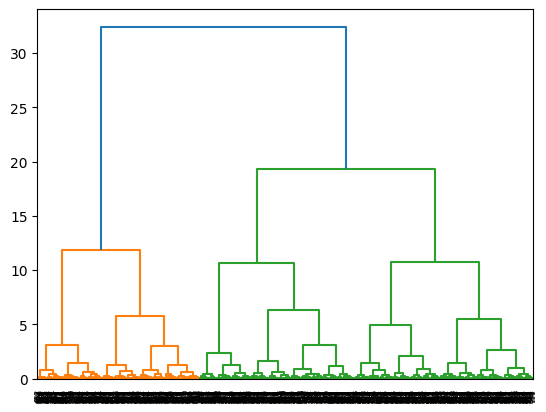

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X_ex3))
plt.show()

## Density Based Clustering - DBSCAN

### Exemplo 4

In [ ]:
centers = [[1, 1], [-1, -1], [1, -1]]
X_ex4, labels_true = make_blobs(n_samples=750, centers = centers, cluster_std = 0.4, random_state = 20111974)

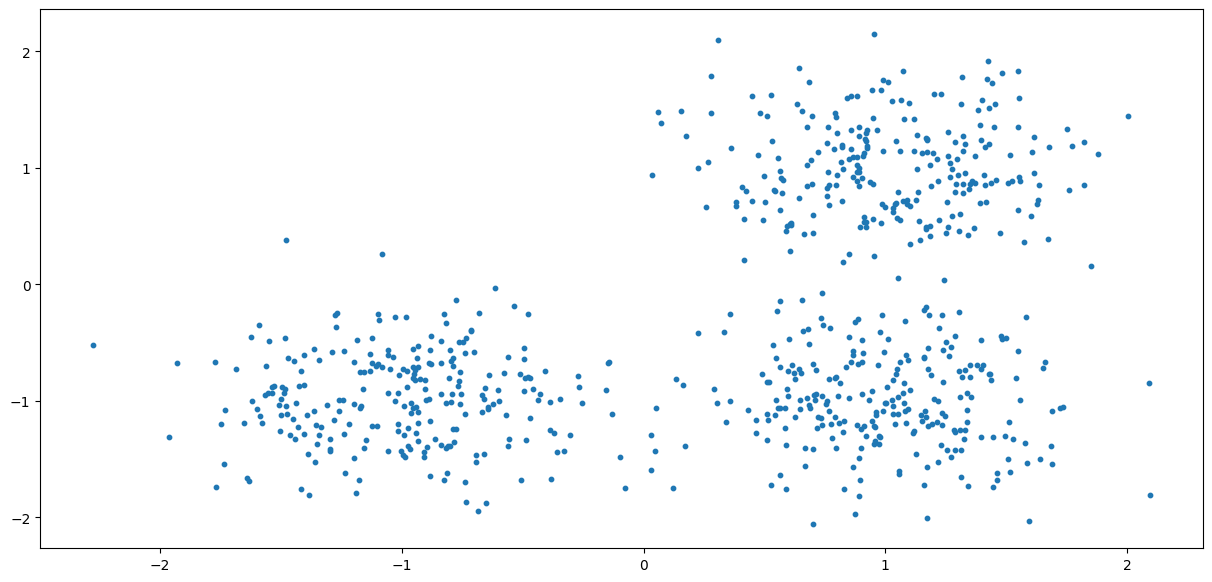

In [ ]:
f, ax = plt.subplots(figsize = (15, 7))
plt.scatter(X_ex4[:, 0], X_ex4[:, 1], s = 10)

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
from sklearn.preprocessing import StandardScaler
X_ex4 = StandardScaler().fit_transform(X_ex4)

db = DBSCAN(eps = 0.3, min_samples = 10).fit(X_ex4)
core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

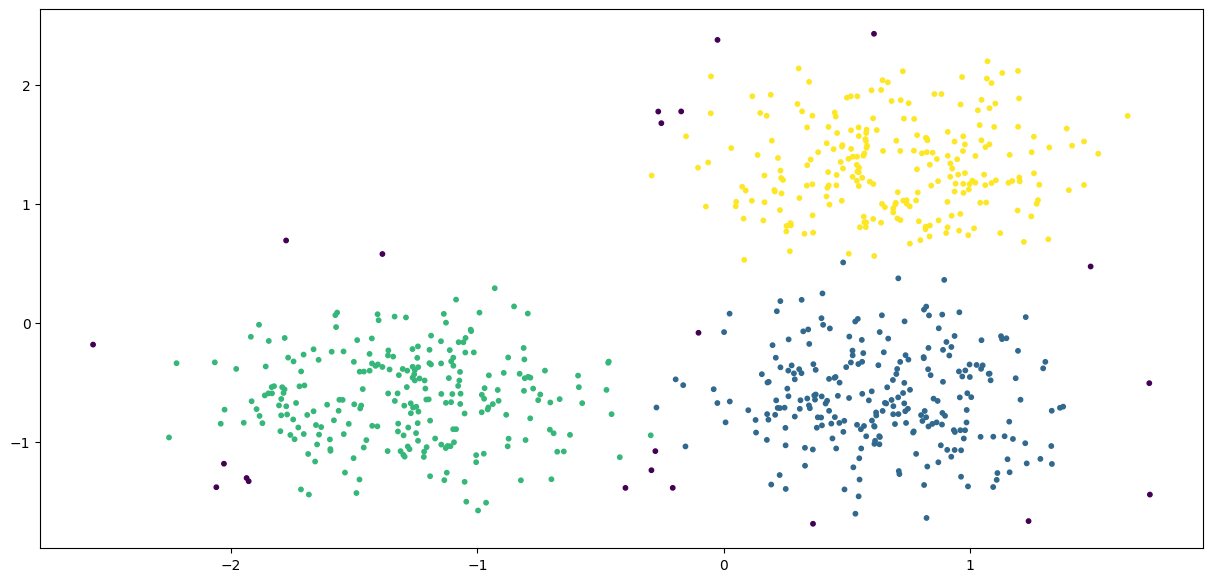

In [ ]:
f, ax = plt.subplots(figsize = (15, 7))
plt.scatter(X_ex4[:, 0], X_ex4[:, 1], s = 10, c = labels)

# Medir a Performance dos Clusters

## completeness_score
- 'Completeness' significa que todos os pontos/dados que são membros de uma determinada classe são elementos do mesmo cluster.
- Accuracy é 1.0 se o dado/ponto pertencente à mesma classe também pertence ao mesmo cluster, mesmo que múltiplas classes pertençam ao mesmo cluster.

In [ ]:
from sklearn.metrics.cluster import completeness_score

In [ ]:
completeness_score(labels_true = [10, 10, 11, 11], labels_pred = [1, 1, 0, 0])

1.0

* Acurácia= 1 porque todos os dados/pontos pertencentes à mesma classe também pertence ao mesmo cluster.

In [ ]:
completeness_score(labels_true = [11, 22, 22, 11], labels_pred = [1, 0, 1, 1])

0.3836885465963443

Porque a Acurácia = 0.3?

In [ ]:
print(completeness_score([10, 10, 11, 11], [0, 0, 0, 0]))

1.0


Porque a Acurácia= 1?

## Homogeneity_score
- Uma clusterização satisfaz a homogeneidade se todos os seus clusters contiverem apenas pontos/dados que são membros de uma única classe.

In [ ]:
from sklearn.metrics.cluster import homogeneity_score

In [ ]:
homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0

In [ ]:
homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3])

0.9999999999999999

In [ ]:
homogeneity_score([0, 0, 0, 0], [1, 1, 0, 0])

1.0

* Mesma classe subdividida em 2 clusters.

## silhoutte_score
* Calculado usando a distância intra-cluster média (a) e a distância média do cluster mais próximo (b) para cada amostra.
* **Decisão**: Quanto Maior --> Melhor.

### Exemplo 5
* Selecionar o número de clusters usando silhoutte_score no KMeans

In [ ]:
from sklearn.datasets import make_blobs
X_ex5, y_ex5 = make_blobs(n_samples = 1000,
                          n_features = 2,
                          centers = 4,
                          cluster_std = 1,
                          center_box = (-10.0, 10.0),
                          shuffle = True,
                          random_state = 20111974)

X_ex5

array([[ 5.45276397, -2.35961577],
       [ 5.72505922,  1.83363387],
       [ 1.94586018,  2.11914071],
       ...,
       [-0.52845833,  3.25611551],
       [ 7.98301575, -1.58441664],
       [ 0.14907412,  2.67817869]])

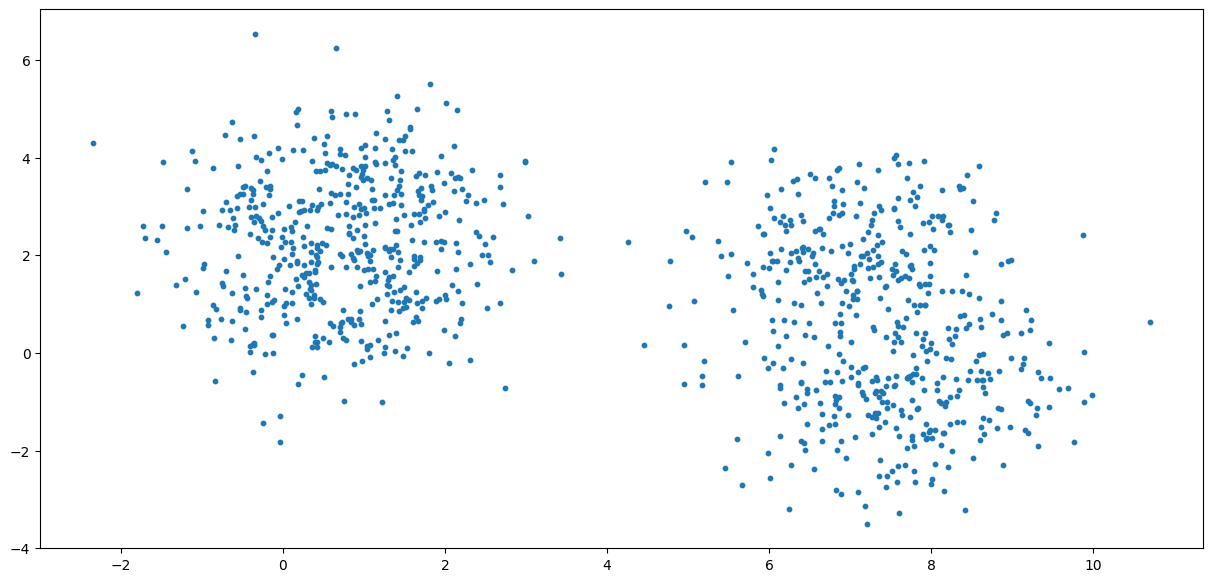

In [ ]:
f, ax = plt.subplots(figsize = (15, 7))
plt.scatter(X_ex5[:, 0], X_ex5[:, 1], s = 10)

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X_ex5)
    labels = kmeans.predict(X_ex5)
    print (n_cluster, silhouette_score(X_ex5, labels))
    print('------------------------------------------')
    #print (n_cluster, completeness_score(X_ex5, labels))

2 0.6668367403841016
------------------------------------------
3 0.574952865546405
------------------------------------------
4 0.43568268147476225
------------------------------------------
5 0.38763339504338107
------------------------------------------
6 0.4224866917753301
------------------------------------------


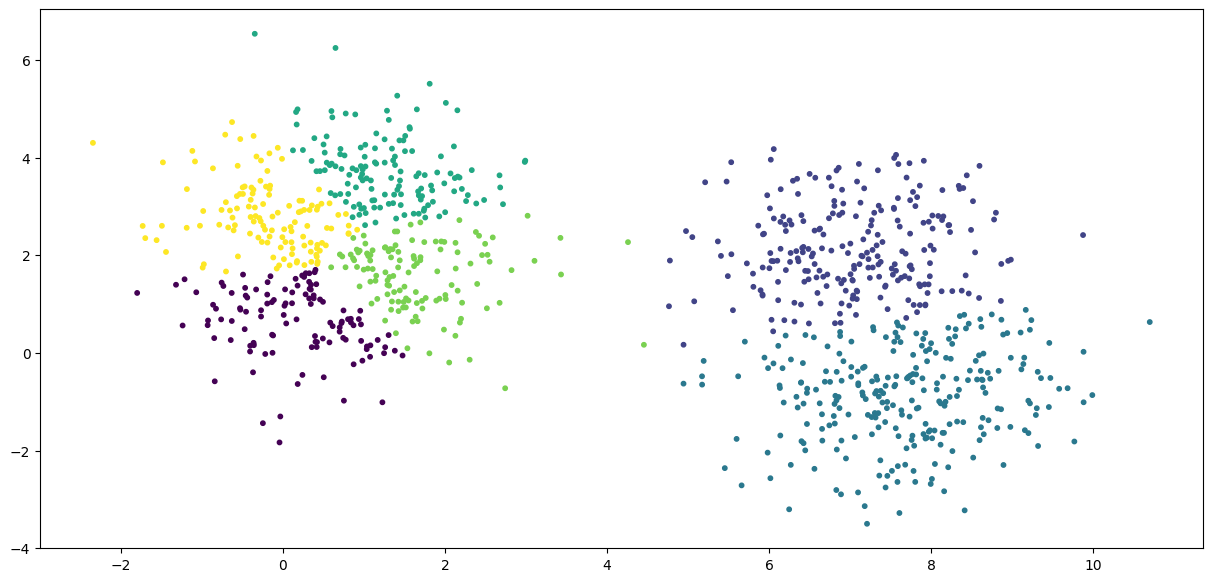

In [ ]:
f, ax = plt.subplots(figsize = (15, 7))
plt.scatter(X_ex5[:, 0], X_ex5[:, 1], s = 10, c = labels)

* O número ótimo/recomendado de cluster é 2. Porque?

## calinski_harabaz_score
* Este score é calculado como razão entre a dispersão dentro do cluster e a dispersão entre cluster.
* **Decisão**: Quanto menor --> Melhor.

In [ ]:
# The function was renamed in later versions of scikit-learn
from sklearn.metrics import calinski_harabasz_score

for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters= n_cluster)
    kmeans.fit(X_ex5)
    labels = kmeans.predict(X_ex5)
    print (n_cluster, calinski_harabasz_score(X_ex5, labels)) # Use the corrected function name

2 3311.090043997879
3 2766.626901669918
4 2667.401745264943
5 2313.957722753877
6 2144.3109431973953


In [ ]:
Numero_Clusters_Elbow(X_ex5)

[3.755153806431076,
 1.6961958772876813,
 1.500245542002272,
 1.1640189586078207,
 1.0916537636242485,
 1.02055139912885,
 0.9578488571450522,
 0.9054455917498324,
 0.8442469963924788]

# Principal Components Analysis
- O PCA é uma técnica de redução de dimensionalidade (número de colunas/features de uma tabela) que transforma as features de um dataset em componentes principais. Ele ajuda a identificar as dimensões mais relevantes para a análise, preservando a maior parte da variabilidade dos dados. O PCA ajuda a reduzir o número de colunas correlacionadas, removendo a redundância nos dados. Em outras palavras, o PCA mantém (ou mostra) quais são as colunas mais importantes para os modelos de Machine Learning.

    - Etapas principais para usar o PCA:
        * Entender o Dataset: Entender as correlações entre as colunas é muito importante para Machine Learning de forma geral;

        * Pré-Processamento: Escalar os dados para garantir que todas as variáveis estejam na mesma escala (usando StandardScaler ou MinMaxScaler).

        * Aplicar o PCA: Transformar os dados originais em componentes principais.

        * Interpretar os Resultados: Identificar quais componentes principais retêm mais variabilidade e decidir quantos componentes usar.

A seguir, criamos um dataframe fake usando a library Faker para aprendermos os principais conceitos por trás do PCA.

In [ ]:
!pip install faker

In [ ]:
# Re-importar as bibliotecas após o reset do ambiente
from faker import Faker
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Inicializar o Faker e definir a semente aleatória
fake = Faker()
Faker.seed(42)

# Gerar um conjunto de dados sintético com 5000 linhas e 10 colunas
n_rows = 5000
n_columns = 10

# Criar dados aleatórios para as colunas
np.random.seed(42)
data = {
    f"Feature_{i+1}": np.random.uniform(10, 100, n_rows) + np.random.normal(0, 10, n_rows)
    for i in range(n_columns)
}

# Adicionar correlações leves entre algumas features
data["Feature_2"] = data["Feature_1"] + np.random.normal(0, 5, n_rows)
data["Feature_3"] = data["Feature_2"] * 0.5 + data["Feature_4"] * 0.3

# Converter para um DataFrame
df = pd.DataFrame(data)

# Exibir o conjunto de dados gerado para o usuário
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
0,37.738868,41.407217,30.097282,31.312246,17.587495,106.169016,97.277243,67.625335,9.299246,71.671043
1,71.661244,66.075374,59.872456,89.449231,33.475992,60.987319,60.476038,82.179352,28.283846,69.150734
2,71.757247,83.761143,71.474122,98.645168,53.295994,67.507905,51.773423,104.582603,74.371274,113.071741
3,73.014001,69.946367,44.850277,32.923646,34.259670,89.309858,56.376833,-0.894649,67.112101,97.823832
4,29.417977,37.129521,29.169583,35.349407,4.099224,49.262307,64.369616,48.994156,90.275827,91.739969


### 1. Escalar os Dados

In [ ]:
from sklearn.preprocessing import StandardScaler

# Escalar o dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data

array([[-0.60550736, -0.46759685, -0.82419061, ...,  0.4380053 ,
        -1.61480517,  0.5904112 ],
       [ 0.61773242,  0.40756002,  0.98169488, ...,  0.95626572,
        -0.93497593,  0.49975599],
       [ 0.6211943 ,  1.03500139,  1.68534415, ...,  1.75403299,
         0.71539228,  2.07958914],
       ...,
       [-0.59705555, -0.79423266, -1.32921531, ..., -1.44812894,
        -1.54514241, -0.32724037],
       [ 1.55196993,  1.15810776,  0.80100495, ..., -0.33661181,
        -0.68405918,  0.10348595],
       [ 0.99690392,  0.89676679,  1.10210318, ...,  1.13282821,
         1.60238357,  1.55237591]])

### 2. Aplicar PCA

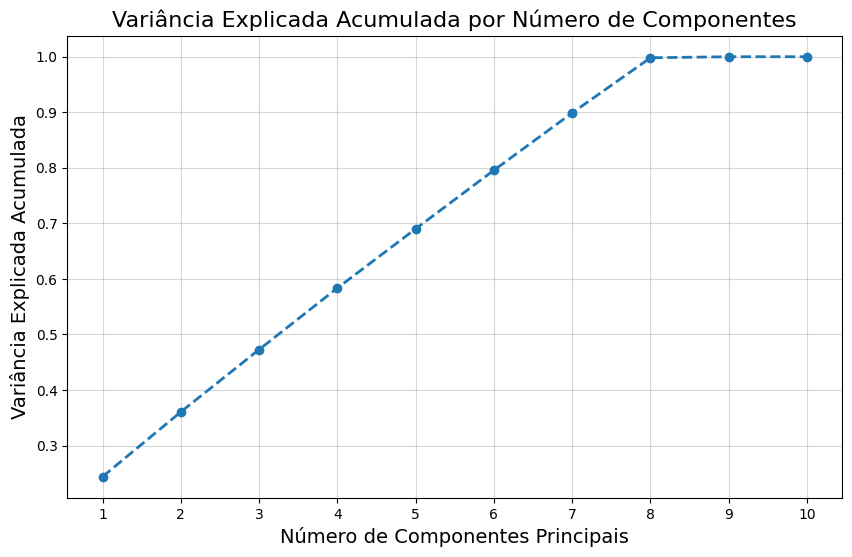

In [ ]:
# Calcular a variância explicada acumulada usando PCA
pca = PCA(n_components=10)
pca.fit(df)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Gerar um gráfico para visualizar a variância explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), cumulative_variance, marker='o', linestyle='--', linewidth=2)
plt.xticks(range(1, 11))
plt.title("Variância Explicada Acumulada por Número de Componentes", fontsize=16)
plt.xlabel("Número de Componentes Principais", fontsize=14)
plt.ylabel("Variância Explicada Acumulada", fontsize=14)
plt.grid(alpha=0.5)
plt.show()


In [ ]:
cumulative_variance

array([0.24393574, 0.36055124, 0.47279612, 0.58353125, 0.69014646,
       0.79570335, 0.898847  , 0.99812902, 1.        , 1.        ])

### 3. Selecionar o Número de Componentes

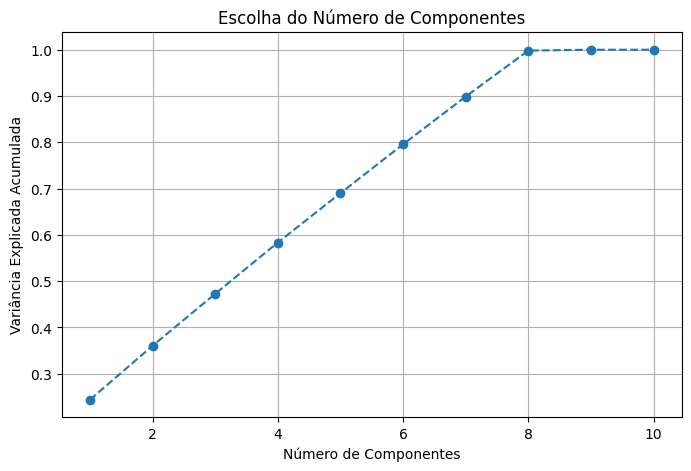

In [ ]:
cumulative_variance = np.cumsum(explained_variance_ratio)

# Gráfico da variância explicada acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Número de Componentes")
plt.ylabel("Variância Explicada Acumulada")
plt.title("Escolha do Número de Componentes")
plt.grid()
plt.show()

#### EXPLICAÇÃO:
- Olhando o gráfico, observamos que a variância acumulada atinge 100% no 8º componente.
- Nesse caso, escolhemos 8 componentes principais, porque eles explicam a maior parte da variância.
- Se, por outro lado, quisermos reduzir ainda mais o número de componentes principais, podemos por exemplo escolher 7 componentes principais, pois a variância explicada é aproximadamente igual a 90%.

### 4. Reduzir Dimensionalidade
- Abaixo eu escolhi 2 componentes principais somente para mostrar o gráfico. Para número de componentes principais maior que 3, não conseguimos visualizar o gráfico.

In [ ]:
# Selecionar os 2 principais componentes
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(scaled_data)

# Transformar os dados e criar um novo DataFrame com os componentes principais
df_pca_2d = pd.DataFrame(data=pca_2_result, columns=["PC1", "PC2"])
df_pca_2d["Label"] = "Cluster"  # Pode adicionar clusters ou categorias para análise
df_pca_2d.head()

,PC1,PC2,Label
0,-1.253101,-0.488981,Cluster
1,1.355485,1.021450,Cluster
2,2.167340,1.490214,Cluster
3,0.552782,-0.413806,Cluster
4,-1.517881,-0.423138,Cluster


### 5. Visualizar os Clusters em 2D


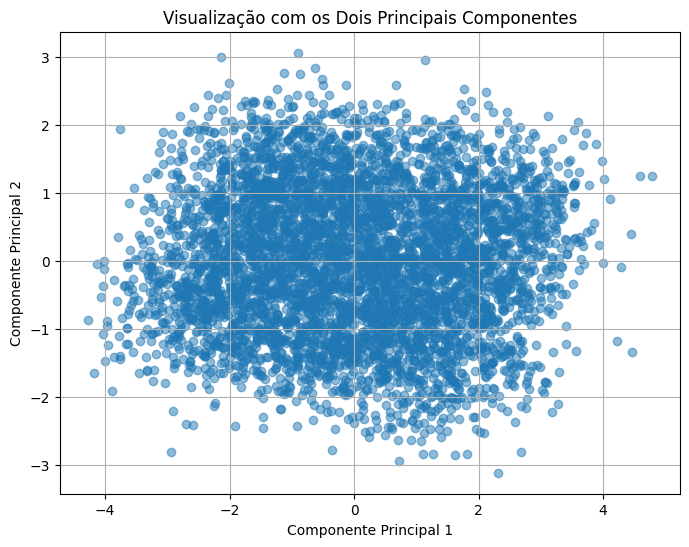

In [ ]:
# Gráfico dos dois principais componentes
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_2d["PC1"], df_pca_2d["PC2"], alpha=0.5)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Visualização com os Dois Principais Componentes")
plt.grid()
plt.show()

### Conclusão sobre o PCA:
O PCA simplifica os dados reduzindo sua dimensionalidade, o que facilita a análise e visualização sem perder muita variabilidade. Isso é especialmente útil em clustering, classificação e visualizações de dados multidimensionais.

# Exercícios
Considere o dataframe a seguir, criado através da library faker.

In [ ]:
from faker import Faker
import pandas as pd
import numpy as np

# Inicializa a criação dos dados fakes
fake = Faker()
Faker.seed(42)
np.random.seed(42)

# Define o número de linhas e colunas do dataframe
n_rows = 5000
n_columns = 20

data = {
    'ID': range(1, n_rows + 1),
    'Name': [fake.name() for _ in range(n_rows)],
    'Age': np.random.randint(18, 70, n_rows),
    'Salary': np.random.uniform(20000, 120000, n_rows),
    'Department': [fake.job() for _ in range(n_rows)],
    'Date_of_Joining': [fake.date_this_century() for _ in range(n_rows)],
    'Performance_Score': np.random.uniform(0, 10, n_rows),
    'Location': [fake.city() for _ in range(n_rows)],
    'Marital_Status': np.random.choice(['Single', 'Married', 'Divorced'], n_rows),
    'Children': np.random.randint(0, 5, n_rows),
    'Home_Loan': np.random.choice([True, False], n_rows),
    'Education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], n_rows),
    'Work_Experience': np.random.randint(1, 30, n_rows),
    'Health_Score': np.random.uniform(50, 100, n_rows),
    'Bonus_Amount': np.random.uniform(1000, 15000, n_rows),
    'Travel_Distance': np.random.uniform(1, 50, n_rows),
    'Commute_Time': np.random.randint(10, 120, n_rows),
    'Annual_Leave_Days': np.random.randint(10, 30, n_rows),
    'Job_Level': np.random.choice(['Entry', 'Mid', 'Senior', 'Executive'], n_rows),
    'Attrition_Flag': np.random.choice([True, False], n_rows)
}

# Cria o dataframe
df = pd.DataFrame(data)

df.head()


,ID,Name,Age,Salary,Department,Date_of_Joining,Performance_Score,Location,Marital_Status,Children,Home_Loan,Education,Work_Experience,Health_Score,Bonus_Amount,Travel_Distance,Commute_Time,Annual_Leave_Days,Job_Level,Attrition_Flag
0,1,Allison Hill,56,115758.101508,"Biochemist, clinical",2022-01-13,4.433203,Danaton,Married,2,True,Master,7,75.962334,6203.743999,8.221173,27,14,Executive,True
1,2,Noah Rhodes,69,59903.531764,Operational researcher,2016-04-25,5.858631,New Leslie,Single,3,False,High School,4,64.782463,14842.601362,22.319412,77,18,Senior,False
2,3,Angie Henderson,46,103980.160666,Research scientist (maths),2012-05-06,9.760783,Chavezfurt,Divorced,0,True,PhD,21,76.995665,3395.702712,17.535417,23,22,Mid,False
3,4,Daniel Wagner,32,38854.060575,Fashion designer,2004-08-15,5.323044,East Deborahton,Divorced,0,False,PhD,10,78.690938,1021.334514,20.035410,14,22,Executive,False
4,5,Cristian Santos,60,87246.049803,Ophthalmologist,2000-08-15,9.053218,Alanborough,Single,0,True,Bachelor,24,78.873645,9327.557579,37.903847,71,18,Executive,True




1. Preparação dos Dados
- Exercício: Use o dataframe criado anteriorment. Preprocessar os dados para garantir que todas as features estejam escaladas (usando `StandardScaler` ou `MinMaxScaler`). Por que é importante escalar os dados antes de aplicar PCA ou clustering?

2. Aplicação de K-Means
- Exercício: Aplique o algoritmo K-Means ao dataset com diferentes valores de `k` (número de clusters). Para cada valor de `k`, calcule a soma dos erros quadrados (SSE) e determine o melhor número de clusters usando o método do cotovelo.

3. PCA para Redução de Dimensionalidade
- Exercício: Aplique PCA ao dataset para reduzir suas dimensões para 2 componentes principais. Visualize os dados em um gráfico de dispersão (scatter plot) usando as duas primeiras componentes principais.

4. Combinação de PCA e K-Means
- Exercício: Use PCA para reduzir o dataset para 2 componentes principais e, em seguida, aplique o K-Means ao dataset reduzido. Visualize os clusters no espaço bidimensional das componentes principais.

5. Interpretação da Variância Explicada
- Exercício: Após aplicar PCA, calcule e visualize a variância explicada por cada componente principal. Quantos componentes são necessários para explicar 90% da variância nos dados?

6. Comparação entre K-Means e Hierarchical Clustering
- Exercício: Aplique tanto o K-Means quanto o agrupamento hierárquico ao mesmo dataset. Compare os resultados dos clusters formados pelas duas abordagens.

7. Avaliação dos Clusters
- Exercício: Após formar clusters com K-Means, avalie a qualidade dos clusters usando métricas como Silhouette Score e Calinski-Harabasz Index. Qual métrica é mais confiável para o seu dataset?

8. Aplicação de DBSCAN (Density-Based Spatial Clustering)
- Exercício: Use o algoritmo DBSCAN para agrupar os dados. Ajuste os parâmetros `eps` e `min_samples` para melhorar a detecção de clusters. Em quais situações DBSCAN é mais eficaz do que K-Means?

9. Identificação de Outliers com PCA
- Exercício: Após aplicar PCA, identifique e visualize outliers no espaço das componentes principais. Dica: Use um gráfico de dispersão para destacar os pontos que estão longe da média.

10. Clustering com PCA e Análise de Resultados
- Exercício: Combine PCA com um método de clustering (como K-Means ou DBSCAN) para criar grupos. Em seguida, analise cada grupo formado para identificar características comuns entre os dados em cada cluster.